In [2]:
# Set up the environment for anlysis:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.colors as mcolors

In [11]:
# Read in the dataset:
wowbgs2 = pd.read_csv('C:/Users/nmcco/Desktop/wow-data/wow_data/wowbgs2.csv')

# Check out the data info:
wowbgs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5383 entries, 0 to 5382
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Battleground  5383 non-null   object 
 1   Code          5383 non-null   object 
 2   Faction       5383 non-null   object 
 3   Class         5383 non-null   object 
 4   KB            5383 non-null   int64  
 5   D             5383 non-null   int64  
 6   HK            5383 non-null   int64  
 7   DD            5383 non-null   int64  
 8   HD            5383 non-null   int64  
 9   Honor         5383 non-null   int64  
 10  Win           2723 non-null   float64
 11  Lose          2660 non-null   float64
 12  Rol           5383 non-null   object 
 13  BE            954 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 588.9+ KB


The column headers decoded from the source of the data:

* Battleground: Two letter code to indicate the kind of battleground
* Code: code for the battleground team instance
* Faction: faction of the player (Horde or Alliance).
* Class: class of the player (warrior, paladin, hunter, rogue, priest, death knight, shaman, mage, warlock, monk, druid, demon hunter).
* KB: number of mortal kills given by the player.
* D: number of times that the player died.
* HK: number of killings where the player or his/her group contributed.
* DD: damage done by the player.
* HD: healing done by the player.
* Honor: honor awarded to the player.
* Win: 1 if the player won.
* Lose: 1 if the player lost.
* Rol: dps if the player is a damage dealer; heal if the player is focused on healing allies. Not all classes can be healers, just Shaman, Paladin, priest, Monk and Druid, but all classes can be damage dealers.
* BE: some weeks there is a bonus event, when the honor gained is increased. 1 if the battleground happened during that week.

In [12]:
wowbgs2.head()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN


In [13]:
wowbgs2.tail()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
5378,TK,TK40,Horde,Shaman,3,0,47,19154,2611,465,1.0,NaN,dps,1.0
5379,TK,TK40,Alliance,Mage,1,4,12,26117,11492,291,NaN,1.0,dps,1.0
5380,TK,TK40,Alliance,Demon Hunter,2,4,9,39954,9699,282,NaN,1.0,dps,1.0
5381,TK,TK40,Alliance,Paladin,4,6,9,54729,20736,282,NaN,1.0,dps,1.0
5382,TK,TK40,Alliance,Rogue,0,5,10,11495,20355,283,NaN,1.0,dps,1.0


In [14]:
# Checkout the descriptive statistics on the data itself:
wowbgs2.describe()

,KB,D,HK,DD,HD,Honor,Win,Lose,BE
count,5383.000000,5383.000000,5383.000000,5383.000000,5383.000000,5383.000000,2723.0,2660.0,954.0
mean,3.032881,3.050529,26.715400,43880.838752,28290.266766,413.104774,1.0,1.0,1.0
std,3.163663,2.201325,16.102191,34842.726718,39351.377127,214.056282,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.0,1.0,1.0
25%,1.000000,1.000000,14.000000,16838.000000,6526.500000,238.000000,1.0,1.0,1.0
50%,2.000000,3.000000,25.000000,37007.000000,13253.000000,374.000000,1.0,1.0,1.0
75%,5.000000,5.000000,37.000000,62565.000000,29288.000000,537.000000,1.0,1.0,1.0
max,23.000000,13.000000,95.000000,246000.000000,325000.000000,1229.000000,1.0,1.0,1.0


In [15]:
# Checking for nulls in the dataset. True = Nulls False = None

pd.isnull(wowbgs2).any()

Battleground    False
Code            False
Faction         False
Class           False
KB              False
D               False
HK              False
DD              False
HD              False
Honor           False
Win              True
Lose             True
Rol             False
BE               True
dtype: bool

The above tells me that nulls have been found in 3 different columns

* Win
* Lose
* BE

The next step is to look at the nulls to see how they will be handled.

In [16]:
# NOTE: There are also nulls (NaN) in the bonus event (BE) column: 1 = yes, NaN = no.
wowbgs2[(wowbgs2['BE'].isnull())]

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5240,SM,SM37,Alliance,Mage,0,4,3,23127,4090,167,NaN,1.0,dps,NaN
5241,SM,SM37,Alliance,Druid,0,2,2,7682,3543,134,NaN,1.0,dps,NaN
5242,SM,SM37,Horde,Druid,3,0,24,33961,6901,510,1.0,NaN,dps,NaN
5243,SM,SM37,Alliance,Priest,1,5,3,17254,3347,167,NaN,1.0,dps,NaN


In [17]:
# DECISION: Changing all null values (NaN) to 0 values for this dataset to facilitate calculations and parsing.
wowbgsdf = wowbgs2.fillna(0)
wowbgsdf

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,0.0,dps,0.0
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,0.0,dps,0.0
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,0.0,1.0,heal,0.0
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,0.0,1.0,heal,0.0
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,0.0,1.0,dps,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,TK,TK40,Horde,Shaman,3,0,47,19154,2611,465,1.0,0.0,dps,1.0
5379,TK,TK40,Alliance,Mage,1,4,12,26117,11492,291,0.0,1.0,dps,1.0
5380,TK,TK40,Alliance,Demon Hunter,2,4,9,39954,9699,282,0.0,1.0,dps,1.0
5381,TK,TK40,Alliance,Paladin,4,6,9,54729,20736,282,0.0,1.0,dps,1.0


# **Honor Points earned**

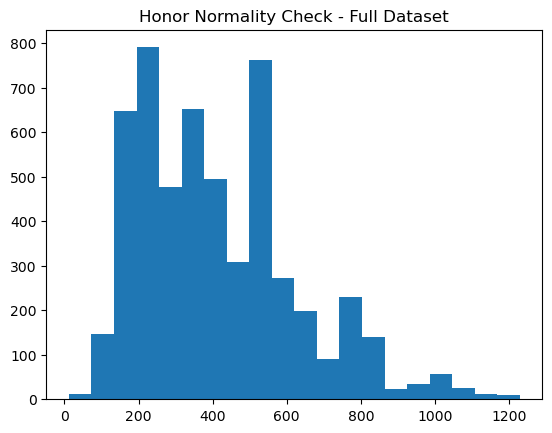

DescribeResult(nobs=5383, minmax=(12, 1229), mean=413.1047742894297, variance=45820.09195602021, skewness=0.8426806224238067, kurtosis=0.3856352044714444)


In [18]:
plt.hist(wowbgsdf['Honor'], bins=20)
plt.title('Honor Normality Check - Full Dataset')
plt.show()
print(stats.describe(wowbgsdf['Honor']))

CONCLUSION: While the histogram looks to be mostly normal, there is a tail to the right. This doesn't matter too much though as the skewness and kurtosis scores are well within the limits to proceed accordingly.

In [19]:
# Let's split the data into two groups: bonus event and non-bonus event
print('Bonus Event Weeks:')
wowbgs_be = wowbgsdf[(wowbgsdf['BE'] == 1)]
wowbgs_be.info()

print('\n','Non-Bonus Event Weeks:')
wowbgs_nbe = wowbgsdf[(wowbgsdf['BE'] == 0)]
wowbgs_nbe.info()

Bonus Event Weeks:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 954 entries, 58 to 5382
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Battleground  954 non-null    object 
 1   Code          954 non-null    object 
 2   Faction       954 non-null    object 
 3   Class         954 non-null    object 
 4   KB            954 non-null    int64  
 5   D             954 non-null    int64  
 6   HK            954 non-null    int64  
 7   DD            954 non-null    int64  
 8   HD            954 non-null    int64  
 9   Honor         954 non-null    int64  
 10  Win           954 non-null    float64
 11  Lose          954 non-null    float64
 12  Rol           954 non-null    object 
 13  BE            954 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 111.8+ KB

 Non-Bonus Event Weeks:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4429 entries, 0 to 5244
Data columns (total 14 

It looks like there is a total of 954 rows of data that were acquired during the Bonus Event weeks. This equates to about 18% (954/5382) of the total number of records.

 

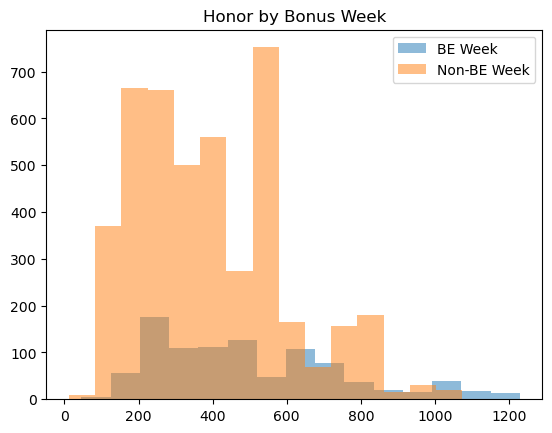

Bonus Event Week:  DescribeResult(nobs=954, minmax=(46, 1229), mean=498.9350104821803, variance=64280.08601327376, skewness=0.7936579515096742, kurtosis=-0.08529072901304424) 

Non-Bonus Event Week:  DescribeResult(nobs=4429, minmax=(12, 1074), mean=394.61706931587264, variance=39928.42062998187, skewness=0.7251433530680809, kurtosis=0.021482558312288624)


In [23]:
plt.hist(wowbgs_be['Honor'], alpha = .5, label= 'BE Week', bins=15)
plt.hist(wowbgs_nbe['Honor'], alpha = .5, label= 'Non-BE Week', bins=15)
plt.legend(loc='upper right')
plt.title('Honor by Bonus Week')
plt.show()

print('Bonus Event Week: ', stats.describe(wowbgs_be['Honor']), '\n')
print('Non-Bonus Event Week: ', stats.describe(wowbgs_nbe['Honor']))

CONCLUSION: Looking at the skewness and kurtosis, since they are so close to 0, both of the data we are looking at during the Bonus Event and Non-Bonus Events, both datasets are close enough to normal for us to continue with more testing.

In [24]:
# Performing the t-test to see if the two groups have a significant difference:
stats.ttest_ind(wowbgs_be['Honor'],wowbgs_nbe['Honor'])

Ttest_indResult(statistic=13.895056932759054, pvalue=3.749179267430651e-43)

The t-score is ~14, which is relatively HIGH for this test and this dataset, and the p-value is WAY lower than <0.001.

CONCLUSION: These scores indicate that the honor points given during the Bonus Event (BE) weeks are significantly different than the non-Bonus Event weeks. Because of this, we are going to focus on the non-Bonus Event week data moving forward to provide a more accurate analysis.

**Question #1:**


On average, does it matter which faction (Alliance or Horde) you play to earn more honor points?

* Ho = There is no difference between the honor points earned as a Alliance player versus a Horde player.
* Ha = There is a statistically significant difference between the honor points earned as an Alliance player versus a Horde player.


In [25]:
# First, let's split the data between Alliance and Horde
nbe_alliance = wowbgs_nbe[(wowbgs_nbe['Faction'] == 'Alliance')]
nbe_horde = wowbgs_nbe[(wowbgs_nbe['Faction'] == 'Horde')]

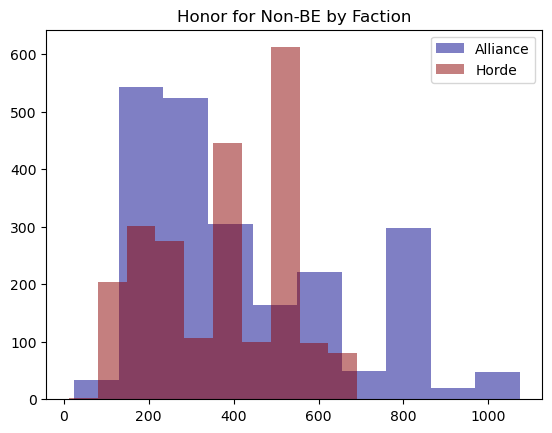

Alliance Honor Gained:  DescribeResult(nobs=2203, minmax=(25, 1074), mean=416.7562414888788, variance=55070.28705798344, skewness=0.7718886319170779, kurtosis=-0.5346851757205093) 

Horde Honor Gained:  DescribeResult(nobs=2226, minmax=(12, 691), mean=372.70664869721475, variance=23995.443344539002, skewness=-0.10768723335790778, kurtosis=-1.17665608237745)


In [33]:
plt.hist(nbe_alliance['Honor'], alpha = .5, label = 'Alliance',color='darkblue')
plt.hist(nbe_horde['Honor'], alpha = .5, label = 'Horde',color='darkred')
plt.legend(loc='upper right')
plt.title('Honor for Non-BE by Faction')
plt.show()

print('Alliance Honor Gained: ', stats.describe(nbe_alliance['Honor']), '\n')
print('Horde Honor Gained: ', stats.describe(nbe_horde['Honor']))

In [34]:
# Performing the t-test on alliance vs horde to see if the two groups have a significant difference:
stats.ttest_ind(nbe_alliance['Honor'],nbe_horde['Honor'])

Ttest_indResult(statistic=7.379443152498448, pvalue=1.8881664112326904e-13)

The t-test shows a p-value of 1.88, in which, we have to reject the null hypotheses and choose the alternative hypotheses, that it does matter, statistically, on average, what faction you are on to earn more Honor points.

CONCLUSION: Looking between both factions, both factions produced a negative kurtosis which is expected with the given Non-Bonus Event week data, but the Horde faction has a negative skew which leads me to believe that the Horde faction did not see a lot of Honor in the battlegrounds while the Alliance faction saw higher gains of Honor across the board.

**Question 2:**

On average, does a single class earn more honor points than the others? In this question, we have 12 different classes to explore.



<AxesSubplot:xlabel='Class', ylabel='Honor'>

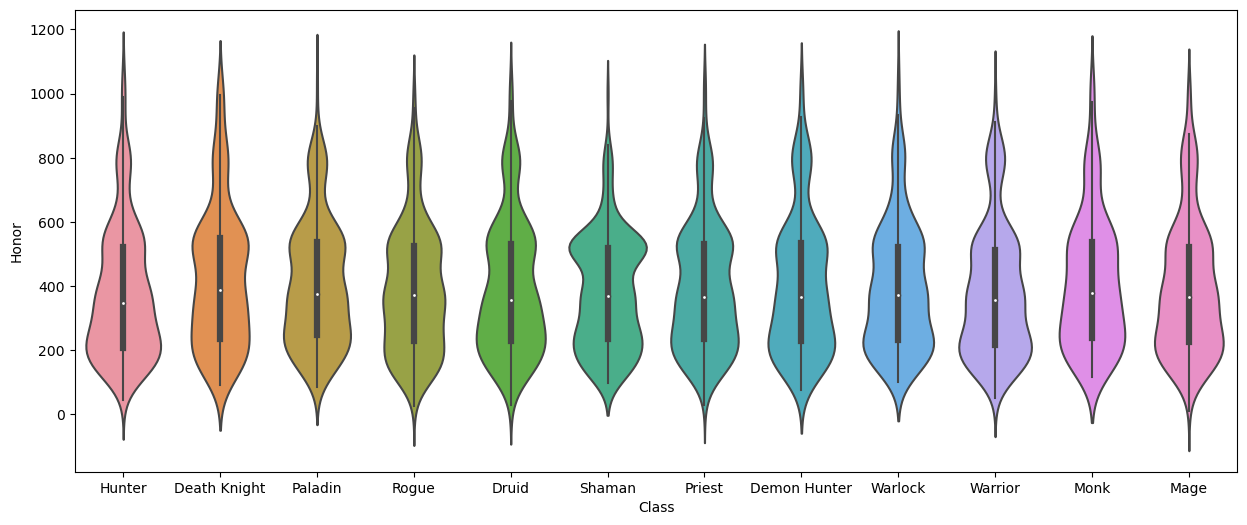

In [37]:
#Let's look at a visual representation of the Honor distribution by Class to see if anything stands out:
plt.figure(figsize=(15,6))
sns.violinplot(x="Class", y="Honor", data=wowbgs_nbe)

In [38]:
WA = wowbgs_nbe.loc[(wowbgs_nbe['Class'] == 'Warrior'), 'Honor']
PA = wowbgs_nbe.loc[(wowbgs_nbe['Class'] == 'Paladin'), 'Honor']
HU = wowbgs_nbe.loc[(wowbgs_nbe['Class'] == 'Hunter'), 'Honor']
RO = wowbgs_nbe.loc[(wowbgs_nbe['Class'] == 'Rogue'), 'Honor']
PR = wowbgs_nbe.loc[(wowbgs_nbe['Class'] == 'Priest'), 'Honor']
DK = wowbgs_nbe.loc[(wowbgs_nbe['Class'] == 'Death Knight'), 'Honor']
SH = wowbgs_nbe.loc[(wowbgs_nbe['Class'] == 'Shaman'), 'Honor']
MA = wowbgs_nbe.loc[(wowbgs_nbe['Class'] == 'Mage'), 'Honor']
WA = wowbgs_nbe.loc[(wowbgs_nbe['Class'] == 'Warlock'), 'Honor']
MO = wowbgs_nbe.loc[(wowbgs_nbe['Class'] == 'Monk'), 'Honor']
DR = wowbgs_nbe.loc[(wowbgs_nbe['Class'] == 'Druid'), 'Honor']
DH = wowbgs_nbe.loc[(wowbgs_nbe['Class'] == 'Demon Hunter'), 'Honor']

In [39]:
# Running ANOVA on all class objects outlined above:
stats.f_oneway(WA, PA, HU, RO, PR, DK, SH, MA, WA, MO, DR, DH)


F_onewayResult(statistic=1.3920305959781551, pvalue=0.1691195855038483)

CONCLUSION: The ANOVA one way analysis returned a p-value that is higher than .05, so we cannot reject the null hypothesis. This means, on average, there is no statistically significant difference in playing one class versus another.

**Question 3:**

On average, does playing a certain role damage role or healing role earn you more honor points?